# Flight Price Prediction

### Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

* Size of training set: **10683** records

* Size of test set: **2671** records

I will be building a Machine Learning Model to predict and forecast Flight Fare.

# Importing Basic Libraries and Loading the Dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing train dataset
#Reading excel file

df = pd.read_excel("Flight_Train.xlsx") #Reading excel file
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#importing test dataset

df_test = pd.read_excel("Flight_Test.xlsx") #Reading excel file
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


We have 2 datasets, Train dataset and Test Dataset. We have Target in Train Dataset and we have to fing target for our test dataset.

# 1- Exploratory Data Analysis

## 1.1 Data Exploration

In [4]:
df.shape

(10683, 11)

We have 10683 rows and 11 columns in our Train dataset

In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Variable Description

1. Airline: The name of the airline.Indigo, Jet Airways, Air India, and many more.

1. Date_of_Journey: The date of the journey

1. Source: The source from which the service begins.

1. Destination: The destination where the service ends.

1. Route: The route taken by the flight to reach the destination.

1. Dep_Time: The time when the journey starts from the source.

1. Arrival_Time: Time of arrival at the destination.

1. Duration: Total duration of the flight.

1. Total_Stops: Total stops between the source and destination.

1. Additional_Info: Additional information about the flight like food, kind of food, and other amenities.

1. Price: The price of the ticket including all the expenses.

In [6]:
#Checking more information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Observations:**

* No much missing data.
* We have 1 INT Type and 100 Object type.
* All Variables are Categorical and we have only our Target as numerical value.

In [7]:
#Lets check if there are Null values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

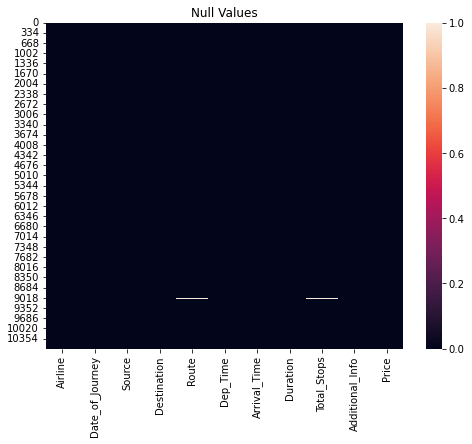

In [8]:
#Visualizing null values by heatmap

plt.figure(figsize=[8,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

We have 1 missing data in Route and Total_Stops. We can use Imputation technique to replace Missing values with Mode of the Column as its a categorical Data type.

### Imputation Technique to fill Missing values

In [9]:
#Replacing NaN values with there mode as those two columns are categorical

df["Route"] = df["Route"].fillna(df["Route"].mode()[0])
df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

In [10]:
#Rechecking null values 

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Our Missing data is resolved

In [11]:
#checking the unique value counts of each feature

df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

**We have:**

* 12 Airlines mentioned in the dataset.
* Date of Journey of 44 different dates.
* 5 Sources and 6 Destinations.
* 128 Routes of travel.
* 222 departure times mentioned and 1343 Arrival time Mentioned in the dataset.
* 368 Durations mentioned in the dataset.
* 5 different categories of Total_stops.
* 10 different categories of Additional Info.
* 1870 different prices in the dataset of 10683 rows.

In [12]:
#lets check unique values for Airline

df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Most of the Data is of Flight- Jet Airways and only 1 data for Trujet and 3 data for Vistara Premium economy.

In [13]:
#lets check unique values for Date_of_Journey

df['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

Most of the data is of date 18/05/2019 and 6/06/2019 only 47 datas of date 1/03/2019

In [14]:
#lets check unique values for Source

df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Most of the data have starting point as Delhi and a few only with Source as Chennai.

In [15]:
#lets check unique values for Destination       

df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Most of the data have Cochin as the destination followed by Bangalore and only few data of Kolkata.

In [16]:
#lets check unique values for Route      

df['Route'].value_counts()

DEL → BOM → COK          2377
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

Most of the data have Rotes Delhi to Cochin with a stopover in Bombay.

In [17]:
#lets check unique values for Dep_Time       

df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [18]:
#lets check unique values for Arrival_time      

df['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [19]:
#lets check unique values for Duration      

df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

Most of the Flights in the dataset have duration of 2h and 50m

In [20]:
#lets check unique values for Total_Stops     

df['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Most of the Flights in the dataset have either 1 stop or non stop.

In [21]:
#lets check unique values for Additional_Info

df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

We have different categories in Additional info like, In-flight meal, check-in baggage, layover info etc.

In [22]:
#lets check unique values for Price(Target)    

df['Price'].value_counts().sort_index()

1759      4
1840      1
1965     36
2017     35
2050     10
         ..
52285     1
54826     3
57209     1
62427     1
79512     1
Name: Price, Length: 1870, dtype: int64

Above is the unique values of Price. We have prices from 1759 to 79512.

## 1.2- Feature Extraction

#### We have Date, Duration and dep and arrival Time in format not recognised by our Machine. We can convert it into meaningful data

In [23]:
#defining the function to change dtype of Object to Date and time:

def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [24]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [25]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Now we have date Time Dtype. We will seperate the Date of Journey into Journey Day and Journey Month for our machine to predict well. We will not take Year because its only 1 unique value which is 2019.

In [26]:
#seperating the day and month from dateofjourney:

df["Journey_Day"] = df["Date_of_Journey"].dt.day
df["Journey_Month"] = df["Date_of_Journey"].dt.month

In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-06-17 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-17 05:50:00,2022-06-17 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-17 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-06-17 18:05:00,2022-06-17 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-06-17 16:50:00,2022-06-17 21:35:00,4h 45m,1 stop,No info,13302,3,1


We have Journey day and Journey Month our dataset. we will drop Date of Jouney

In [28]:
#dropping Date_of_Journey:

df = df.drop(["Date_of_Journey"],axis=1)

The same way, we can split the Dep time and Arrival Time in hours and minutes.

In [29]:
#Seperating hours and minutes and dropping the Dep_Time

df["Dep_hour"]= pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

Similary we will do the same for Arrival_Time

In [30]:
#Seperating hours and minutes and dropping the Arrival_Time

df["Arrival_hour"]= pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

Similarly we have Duration in hours and minutes. but before seperating we will assign 0h to the ones below 1 hour and 0m to the ones with no minutes

In [31]:
# Formating the Duration to correct format 

dur = list(df['Duration'])

for i in range(len(dur)):
    if len(dur[i].split())!=2:
        if "h" in dur[i]:
            dur[i] = dur[i].strip()+' 0m'
        else:
            dur[i]= "0h "+dur[i]
            
dur_hours = []
dur_mins = []
for i in range(len(dur)):
    dur_hours.append(int(dur[i].split(sep="h")[0]))
    dur_mins.append(int(dur[i].split(sep="m")[0].split()[-1]))
    
    
df['Duration_hours']= dur_hours
df['Duration_mins']= dur_mins

In [32]:
#dropping duration column

df.drop(["Duration"],axis=1, inplace = True)

In [33]:
#Lets check the value counts for all again

for i in df.columns:
        print(df[i].value_counts().sort_index())
        print('****************************************')
        print("                                      ")

Air Asia                              319
Air India                            1752
GoAir                                 194
IndiGo                               2053
Jet Airways                          3849
Jet Airways Business                    6
Multiple carriers                    1196
Multiple carriers Premium economy      13
SpiceJet                              818
Trujet                                  1
Vistara                               479
Vistara Premium economy                 3
Name: Airline, dtype: int64
****************************************
                                      
Banglore    2197
Chennai      381
Delhi       4537
Kolkata     2871
Mumbai       697
Name: Source, dtype: int64
****************************************
                                      
Banglore     2871
Cochin       4537
Delhi        1265
Hyderabad     697
Kolkata       381
New Delhi     932
Name: Destination, dtype: int64
****************************************
               

We have duplicates or similar Data. Lets group them
* Airline
* Destination
* Additional_info

In [34]:
#Grouping Airlines column:
# All premium airlines and trujet(only 1 data) to "Other"

df["Airline"].replace({'Multiple carriers Premium economy':'Other', 'Jet Airways Business':'Other',
                'Vistara Premium economy':'Other','Trujet':'Other'}, inplace=True)

In [35]:
#checking the airlines column

df["Airline"].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1752
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Other                  23
Name: Airline, dtype: int64

In [36]:
#Grouping Destination column as we have New delhi and Delhi:;

df['Destination'].replace({'New Delhi':'Delhi'},inplace=True)

In [37]:
#checking the Destination column

df["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [38]:
#Grouping Addition Info:

df["Additional_Info"].replace({'No Info': 'No info'},inplace=True)

In [39]:
#checking the Addition_info column

df["Additional_Info"].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [40]:
#We have too much categories with less than 10 datas. lets combine to 1

df["Additional_Info"].replace({'Change airports':'Other','Business class':'Other',
                               '1 Short layover':'Other','Red-eye flight':'Other'},inplace=True)

In [41]:
df["Additional_Info"].replace({'2 Long layover':'Layover','1 Long layover':'Layover'},inplace=True)

In [42]:
#checking the Addition_info column

df["Additional_Info"].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Layover                           20
Other                             13
Name: Additional_Info, dtype: int64

In [43]:
#describing the dataset

df.describe()

,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630,10.246092,28.327717
std,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036,8.495414,16.945400
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


**Observations:**

* We have a variety of data.
* All the columns have count of 10683
* The Top Airline is JetAirways with frequency 3849.
* Our top Source is Delhi with Frequency 4537.
* Our top destination is Cochin with Frequency 4537.
* Most flights have duration of 2 hours.
* We have only slight skewness in the data as the mean and median are not widely different. Price and journey only have huge difference.

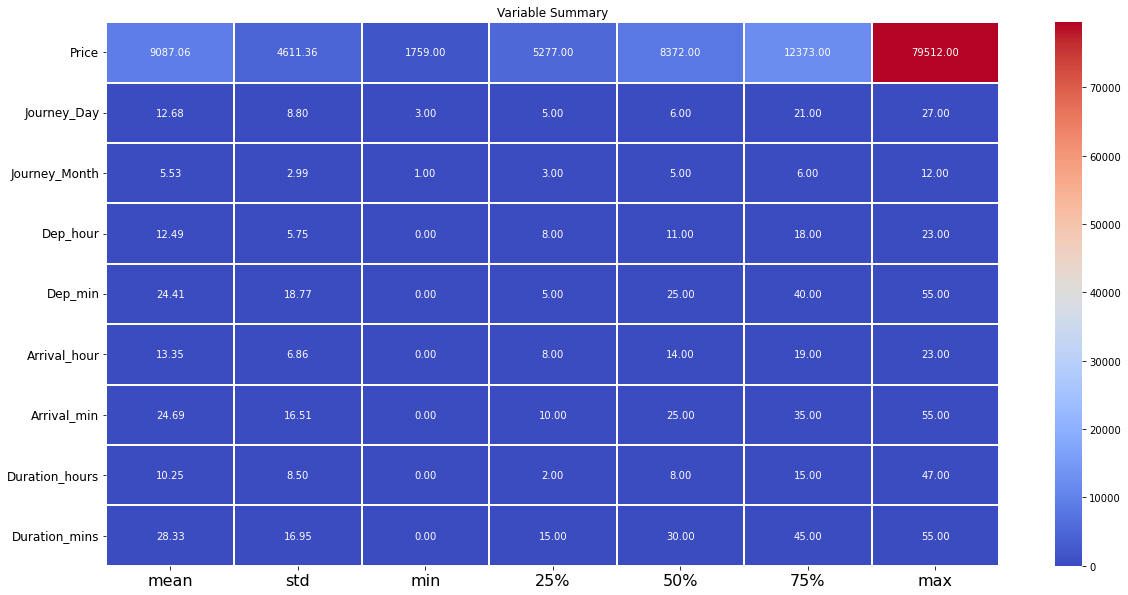

In [44]:
#Heatmap of the Descibe function

plt.figure(figsize=(20,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f',cmap='coolwarm')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

Data description plot shows that no much outliers present.

# 2- Data Visualization

## 2.1 Univariate Analysis

In [45]:
#We have Categorical and Numeric data
#we will plt Route seperately

cat_cols=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

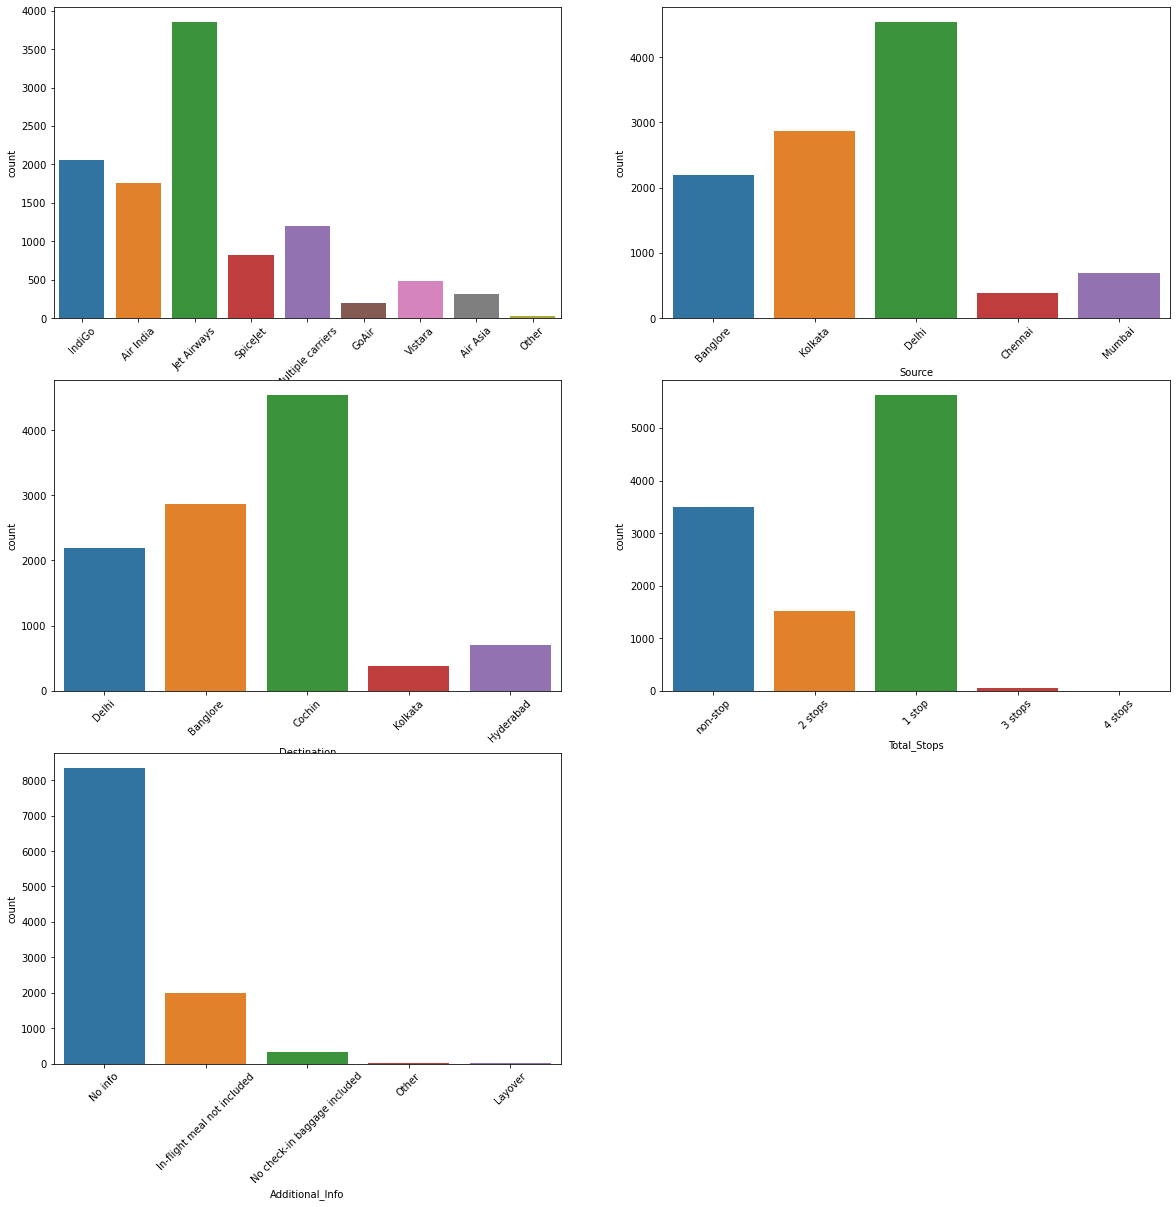

In [46]:
#lets check the count of Categorical data

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for i in df[cat_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(6,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=10)
        plt.xticks(rotation=45)
       
    plotnumber+=1
plt.show()

**Observations:**

* Airlines: We have more data of Jet Airways and then Indigo. We have very few data of Business and Premium class.
* Source: We have 5 main Source where the journey begins and Most of the data have Source as Delhi.
* Destination: We have 5 main Destinations and most of the data have destination as Cochin.
* Total_Stops: We have from Non stop to 4 stops and most of the data is of 1 stop.
* Additional_Info: Most of the data have No info and rest of it includes meal and baggage. Since this is a domestic flight, there is no much baggage and meal options.

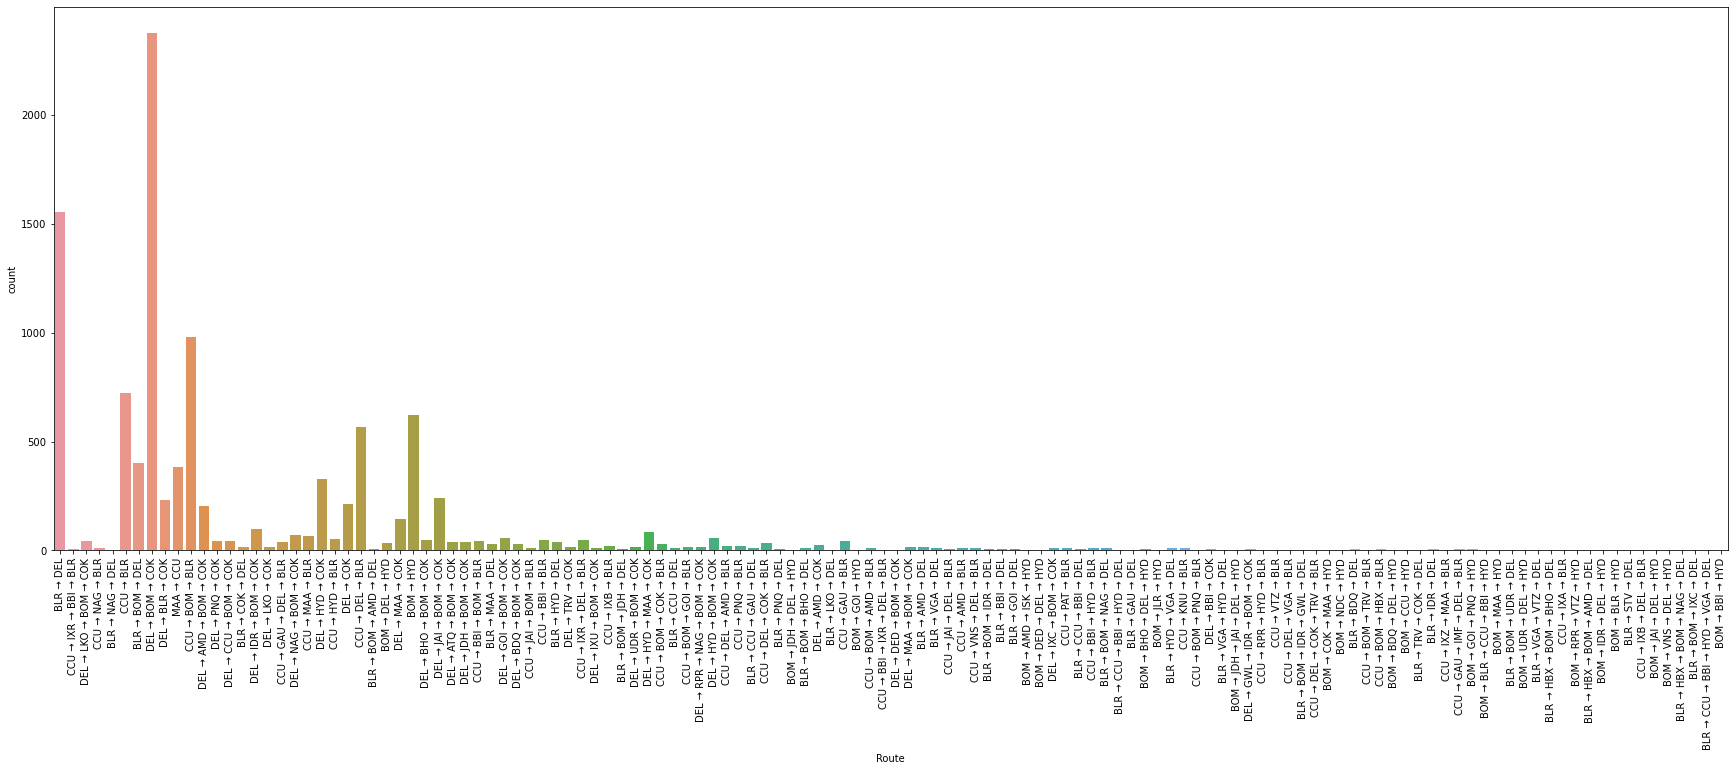

In [47]:
#Count plot for Route column

plt.figure(figsize=[30,10])
sns.countplot(df['Route'])
plt.xticks(rotation=90);

Maximum data is of DEL-BOM-COK.

In [48]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)


['Price', 'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins']


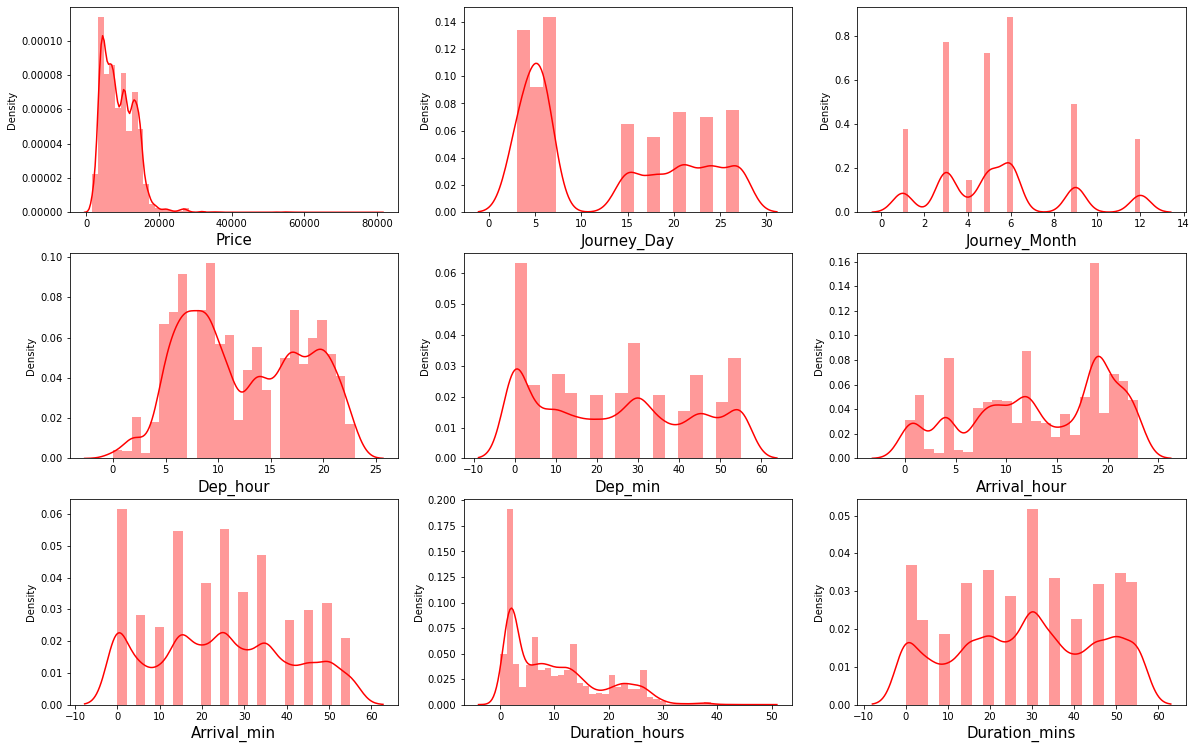

In [49]:
#the distribution of data for numerical columns

num_cols= ['Price', 'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 
           'Arrival_min', 'Duration_hours', 'Duration_mins']

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(df[i],color='red')
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

Skewness is present in most of the columns. distribution is not normal

## 2.2 Bivariate Analysis

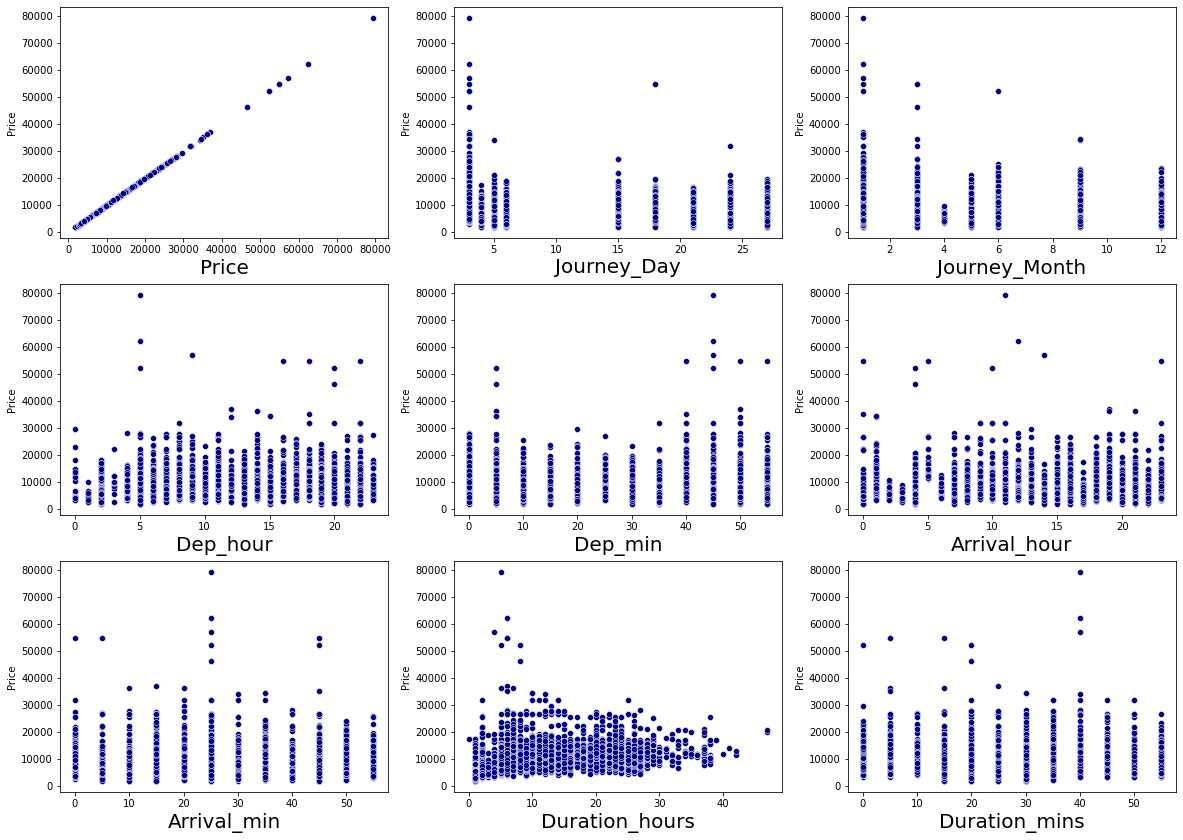

In [50]:
#the relation between numerical columns and the Target Variable?(Scatter plot)


plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(9,3,plotnumber)
        sns.scatterplot(x=df[i],y=df.Price,color='darkblue')
        plt.xlabel(i,fontsize=20)
       
    plotnumber+=1
plt.show()

**Observations:**

* Price is higher during the start of a month. Also price is higher in January.
* The price is higher for the flight departing at 5 in the morning and betwenn 40 to 50 minutes.
* There is no definite pattern on Arrival time of the flight and Price.
* Prices are the highest at 1 to 10 hours duration of flight and doesnt get higher  for 30+ hours duration.

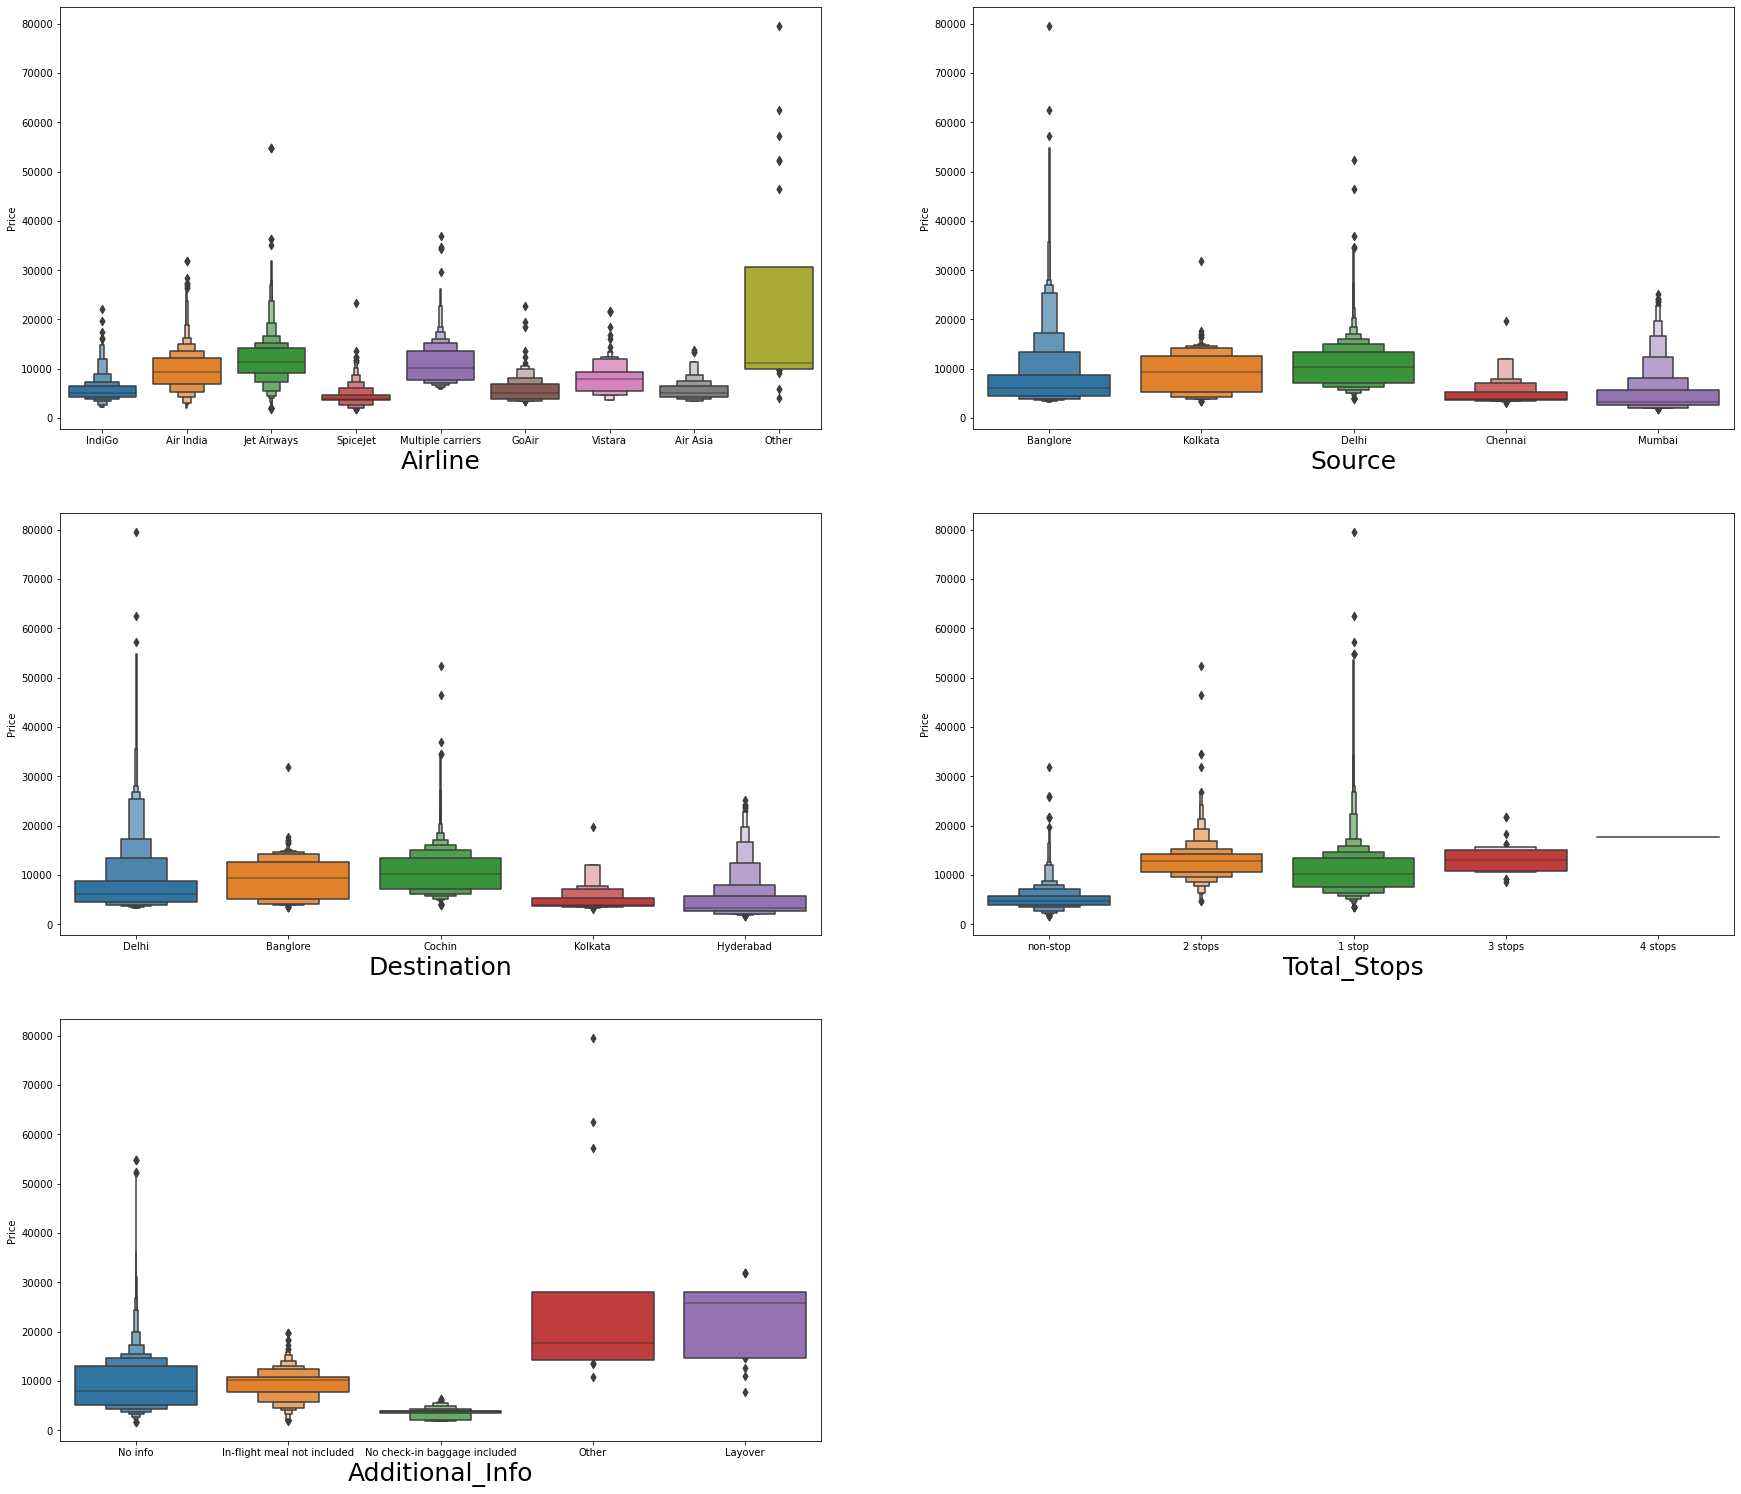

In [51]:
#the relationship between Categorical columns and Target variable?

plt.figure(figsize=(30,45), facecolor='white')
plotnumber = 1

for i in df[cat_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(5,2,plotnumber)
        sns.boxenplot(x=df[i],y=df.Price)
        plt.xlabel(i,fontsize=25)
       
    plotnumber+=1
plt.show()

**Observations:**

* Airline: 
    * The Price range is higher for Other flights because it has all premium and Business class. We have about 80,000 as fare for others category which contains Premium and Business Class.
    * Most of the data is of flight Jet Airways and top fare is between 10,000 to 14,000.
    * The cheapest flight is SpiceJet and top fare is between 2-5,000.
* Source:
    * We have more data as Delhi as the source. the top fare is between 8-13,000. 
    * Flights from Banglore are on different range and we have the highest fare of 80,000 from Banglore. Top fare is between 6-9,000
    * Flight from Mumbai are on a cheaper range and top fare is between 2-5,000.
* Destination: 
    * Destination as Delhi has the Highest price of 80,000. 
    * Hyderabad as destination is of minimal Fare and top is between 2 to 4000.
    * We have the large number of data destination as Cochin. The top fare is between 8 to 13,000.
* Total_Stops:
    * 1 stop flight is the most in the dataset. It is also having the highest Fare of 80,000.
    * Very few flights of 4 stops and price is around 19000.
    * We have Non-Stop flights also and top fare is between 4-6,000.
* Additional_Info:
    * We have Option No-Info the most in the dataset. top fare is between 5-13,000.
    * Flights with Other Option like Business Class, Red-eye flight,etc have the highest fare upto 80,000.
    * Flights with No Check-in baggage has the least Fare range.

### We can assume that, Spicejet from Mumbai to hyderabad With No-checkin baggage and flying in the midnight on the 4th month is the cheapest flight.

### Also Flights from Banglore to Delhi in the Early morning in January in a Business class with 1 stop has the highest fare.

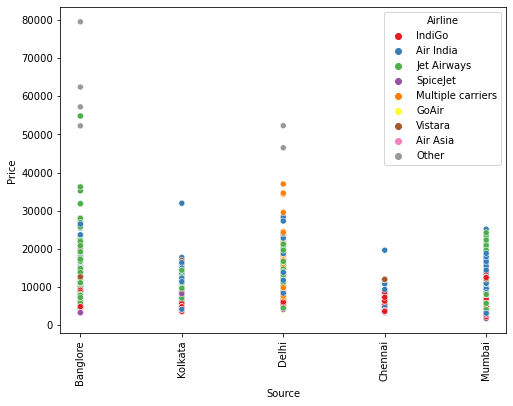

In [52]:
# lets compare Source and Airline

plt.figure(figsize=[8,6])
sns.scatterplot(x="Source",y="Price",hue="Airline",data=df,palette="Set1")
plt.xticks(rotation=90)
plt.show()

* We can see that Jet Airways is the most used flight. Second most used flight in the dataset is Indigo.
* Highest Price is from Banglore and the flight is in Other category which is a Business or Premium class.
* Lowest Price is from Mumbai.

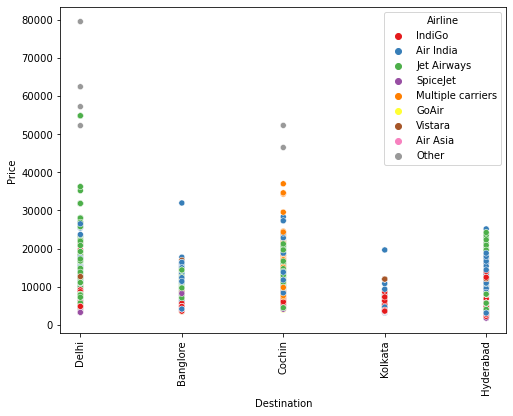

In [53]:
#lets compare Destination and Airline

plt.figure(figsize=[8,6])
sns.scatterplot(x="Destination",y="Price",hue="Airline",data=df,palette="Set1")
plt.xticks(rotation=90)
plt.show()

* Highest price is for Destination Delhi.
* Lowest Price destination is Hyderabad.

## 2.3 Multivariate Analysis

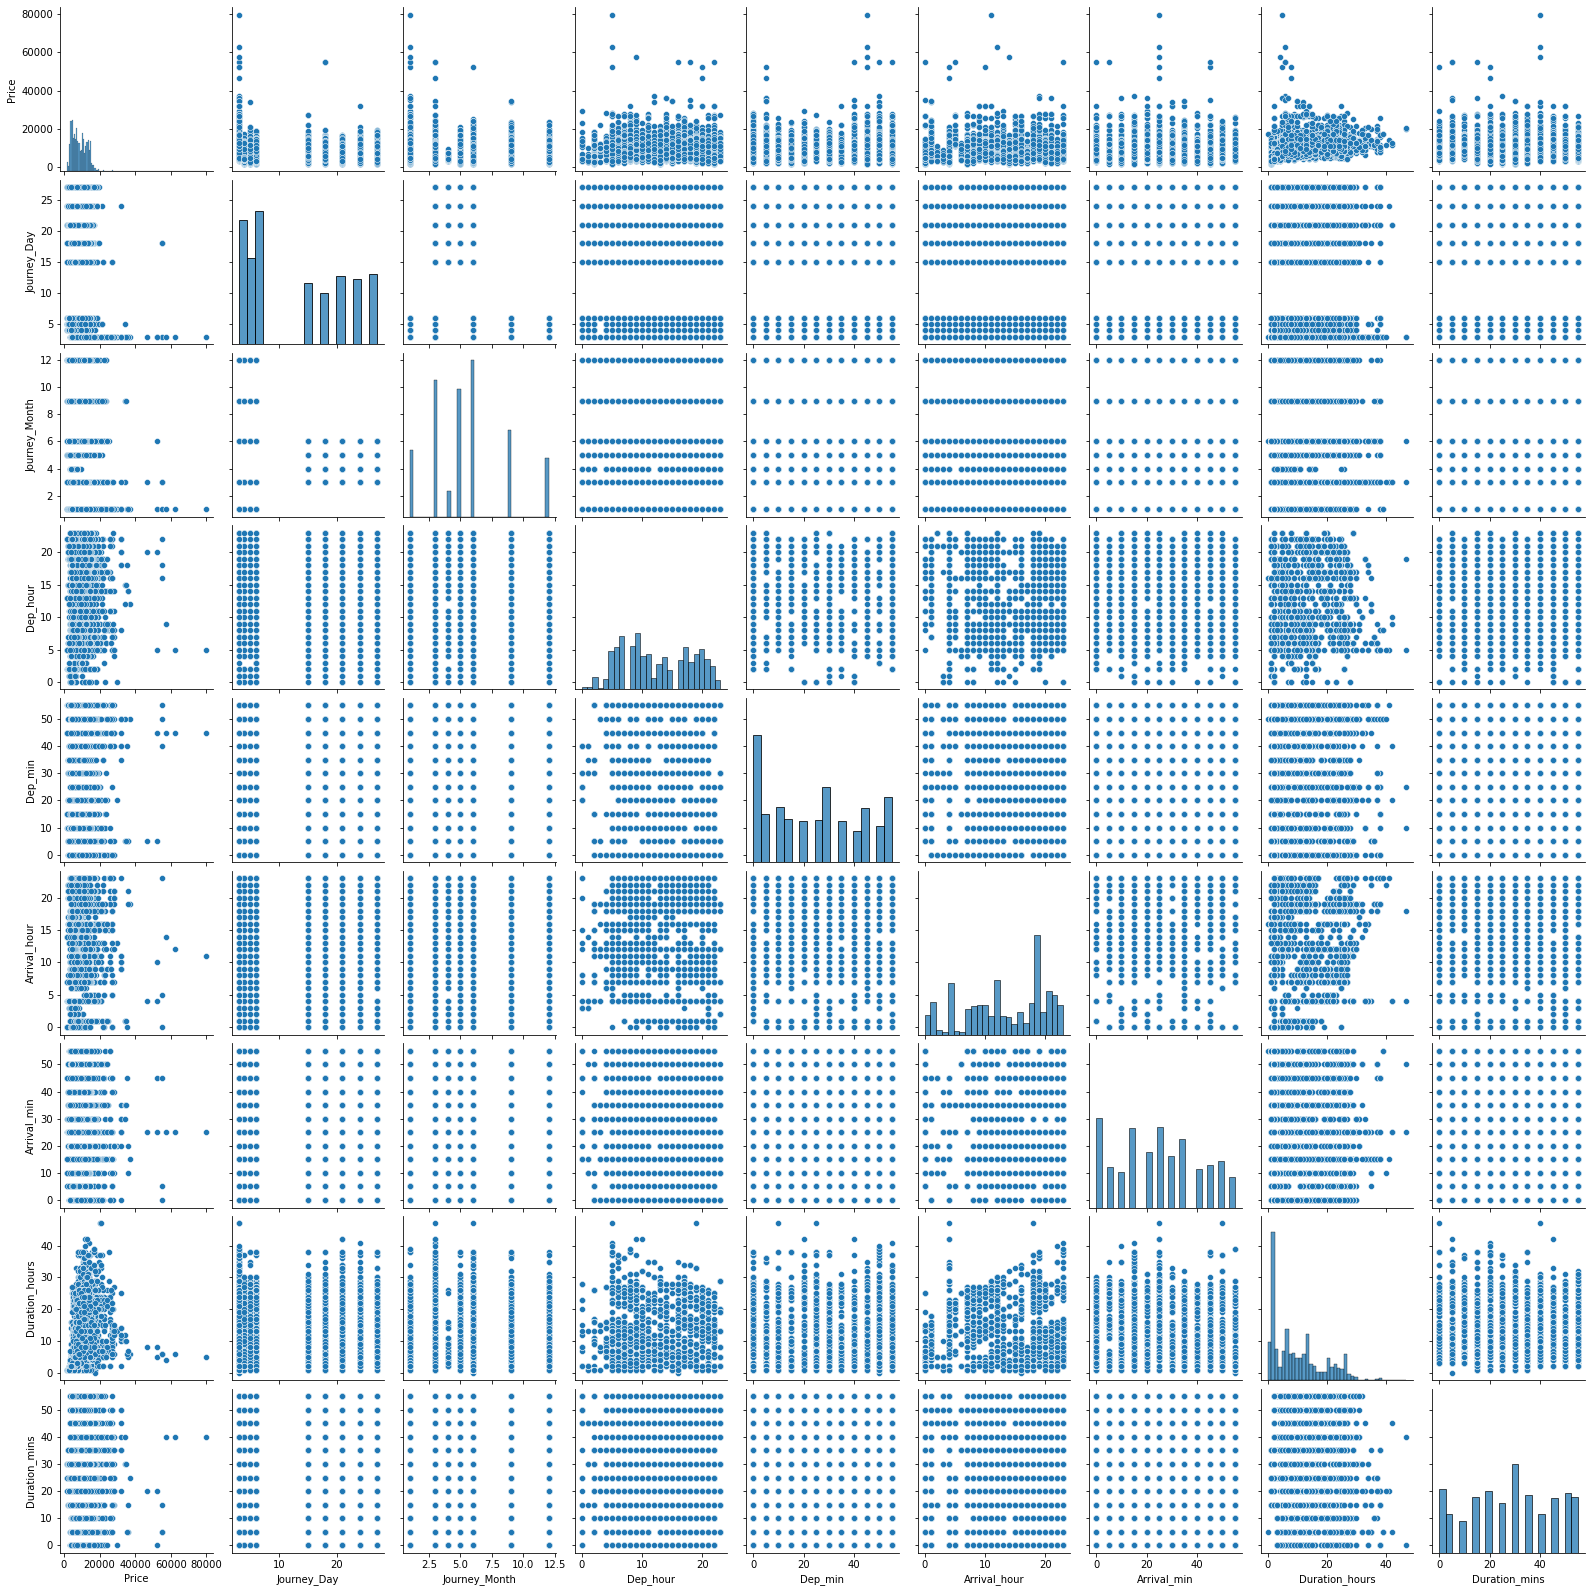

In [54]:
#pair ploting

sns.pairplot(df)

# 3- Data Cleaning

In [55]:
#for Outliers removal, z-score is used
from scipy.stats import zscore

#for Skewness removal, Poer transformer is used
from sklearn.preprocessing import PowerTransformer

#for rncoding Ordinal encoder is used
from sklearn.preprocessing import OrdinalEncoder

#for normalizing, standard scaler is used
from sklearn.preprocessing import StandardScaler

#for checking multicollinearity, VIF Factor is used
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 3.1 Outliers

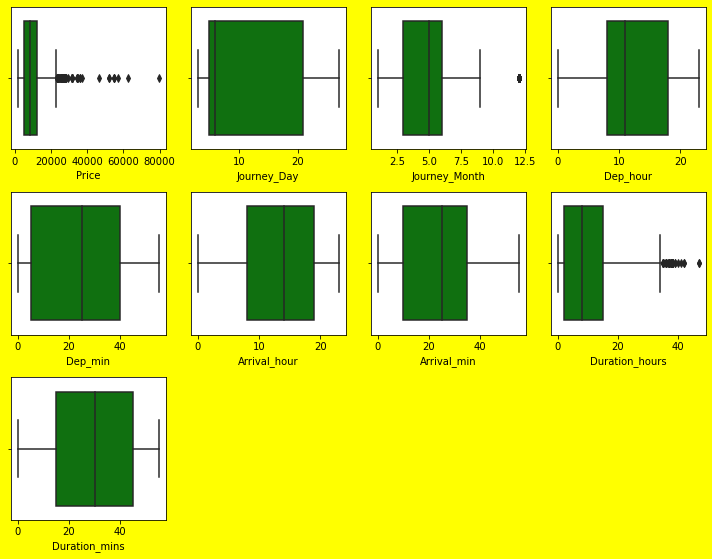

In [56]:
#Checking Outliers for all numerical columns:

plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(4,4,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()


We can see Outliers in Duration hours and Journey Month. lets check which are the outliers.

### Z-Score Method

In [57]:
#Check which are the rows with outliers

out_cols=df[["Journey_Month","Duration_hours"]]

from scipy.stats import zscore

z=np.abs(zscore(out_cols))
threshold=3
print(np.where(z>3))

(array([  226,   553,   966,   969,  1067,  1113,  1346,  1442,  1496,
        1551,  1657,  1791,  1804,  2172,  2553,  2641,  2654,  2718,
        3457,  3790,  3815,  3966,  4047,  4118,  4463,  4655,  5516,
        5701,  5711,  5782,  5933,  5953,  6059,  6085,  6321,  6476,
        6884,  7189,  7232,  7306,  7329,  7553,  7611,  7612,  7876,
        7906,  8127,  8153,  8360,  8409,  8412,  8601,  8621,  8698,
        8729,  9247,  9396,  9484,  9551,  9673,  9703,  9848, 10020,
       10326, 10456, 10639]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))


In [58]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(10617, 15)

In [59]:
print('old data shape:',df.shape)
print('new data shape:',df_new.shape)

old data shape: (10683, 15)
new data shape: (10617, 15)


In [60]:
#checking the loss percentage

loss_percentage=(((10683-10617)/10683)*100)
loss_percentage

0.6178039876439202

Just a small percentage so we can proceed with the zscore method

## 3.2 Skewness

In [61]:
df_new.skew()

Price             1.824502
Journey_Day       0.367029
Journey_Month     0.628224
Dep_hour          0.103798
Dep_min           0.164551
Arrival_hour     -0.361250
Arrival_min       0.107805
Duration_hours    0.761022
Duration_mins    -0.097354
dtype: float64

We have skewness in Price, Journey_Month and Duration Hours. since Price is our target we will not remove from it.

In [62]:
#Removing the Skewness using power transformer

skew_cols=["Journey_Month","Duration_hours"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [63]:
df_new.skew()

Price             1.824502
Journey_Day       0.367029
Journey_Month    -0.026556
Dep_hour          0.103798
Dep_min           0.164551
Arrival_hour     -0.361250
Arrival_min       0.107805
Duration_hours   -0.033470
Duration_mins    -0.097354
dtype: float64

#### Skewness is removed from dataset

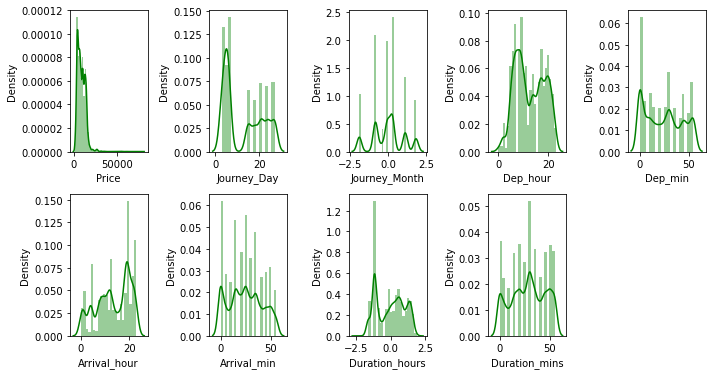

In [64]:
plt.figure(figsize=(10,10))
graph=1 

for column in df_new[num_cols]:

    plt.subplot(4,5,graph)

    sns.distplot(df_new[column],color='green')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

#### We have both Symmetrical and normal distribution

## 3.3 Encoding

In [65]:
cat_cols=['Airline', 'Source', "Route",'Destination', 'Additional_Info']

In [66]:
df_new[cat_cols].head()

,Airline,Source,Route,Destination,Additional_Info
0,IndiGo,Banglore,BLR → DEL,Delhi,No info
1,Air India,Kolkata,CCU → IXR → BBI → BLR,Banglore,No info
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,Cochin,No info
3,IndiGo,Kolkata,CCU → NAG → BLR,Banglore,No info
4,IndiGo,Banglore,BLR → NAG → DEL,Delhi,No info


In [67]:
#Assigning values for Total_stops:

df_new.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [68]:
#Encoding the categorical columns using Ordinal Encoder:

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df_new[i]=enc.fit_transform(df_new[i].values.reshape(-1,1))

In [69]:
df_new[cat_cols].head()

,Airline,Source,Route,Destination,Additional_Info
0,3.0,0.0,18.0,2.0,3.0
1,1.0,3.0,84.0,0.0,3.0
2,4.0,2.0,118.0,1.0,3.0
3,3.0,3.0,91.0,0.0,3.0
4,3.0,0.0,29.0,2.0,3.0


## 3.4 Correlation

In [70]:
df_new.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.009193,0.069376,0.013936,-0.190804,-0.132680,-0.011491,0.028403,-0.001702,-0.028894,-0.052583,-0.018074,-0.080111,-0.118077,-0.035747
Source,-0.009193,1.000000,-0.434677,0.404009,0.195825,-0.047644,0.016718,0.007158,0.063741,0.059469,-0.055929,0.026144,0.021640,0.154223,-0.145872
Destination,0.069376,-0.434677,1.000000,-0.230755,-0.422569,0.086369,-0.263334,0.007309,-0.066754,-0.088810,0.097052,-0.058190,0.006954,-0.485451,0.021895
Route,0.013936,0.404009,-0.230755,1.000000,0.453111,0.011226,0.163635,0.096042,0.063732,-0.070005,-0.066420,0.011514,-0.174071,0.376832,-0.229643
Total_Stops,-0.190804,0.195825,-0.422569,0.453111,1.000000,-0.080926,0.606053,-0.024306,0.067331,-0.047498,-0.000238,0.028785,-0.108161,0.820451,-0.127573
Additional_Info,-0.132680,-0.047644,0.086369,0.011226,-0.080926,1.000000,-0.015737,-0.034626,-0.031860,-0.055600,-0.008765,0.029227,0.047461,-0.188084,0.049838
Price,-0.011491,0.016718,-0.263334,0.163635,0.606053,-0.015737,1.000000,-0.163765,-0.001029,0.011430,-0.025585,0.021107,-0.088909,0.599211,-0.122893
Journey_Day,0.028403,0.007158,0.007309,0.096042,-0.024306,-0.034626,-0.163765,1.000000,-0.173058,-0.002628,-0.017421,-0.001501,-0.021901,-0.041774,-0.008671
Journey_Month,-0.001702,0.063741,-0.066754,0.063732,0.067331,-0.031860,-0.001029,-0.173058,1.000000,0.023911,-0.001769,-0.004881,-0.029184,0.067977,-0.022372
Dep_hour,-0.028894,0.059469,-0.088810,-0.070005,-0.047498,-0.055600,0.011430,-0.002628,0.023911,1.000000,-0.026077,0.010967,0.068350,0.003212,-0.029934


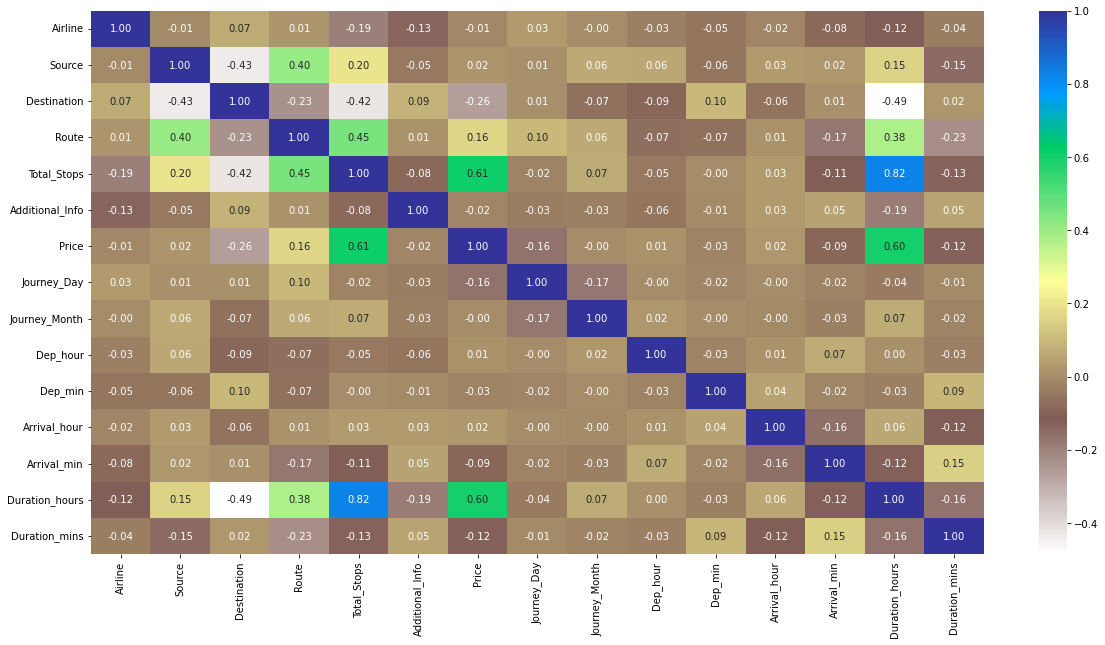

In [71]:
#Plotting the Heatmap of Correlation

corr = df_new.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='terrain_r',fmt='.2f')
plt.show()

**Observations:**

* Our target is highly correlated with Total_Stops and Duration_Hours.
* Destination is also negatively correlated with Price.
* Least Correlation is with Journey month.
* There are some multicollinearity between variables like Total stops and Duration which is normal in this flight fare case.

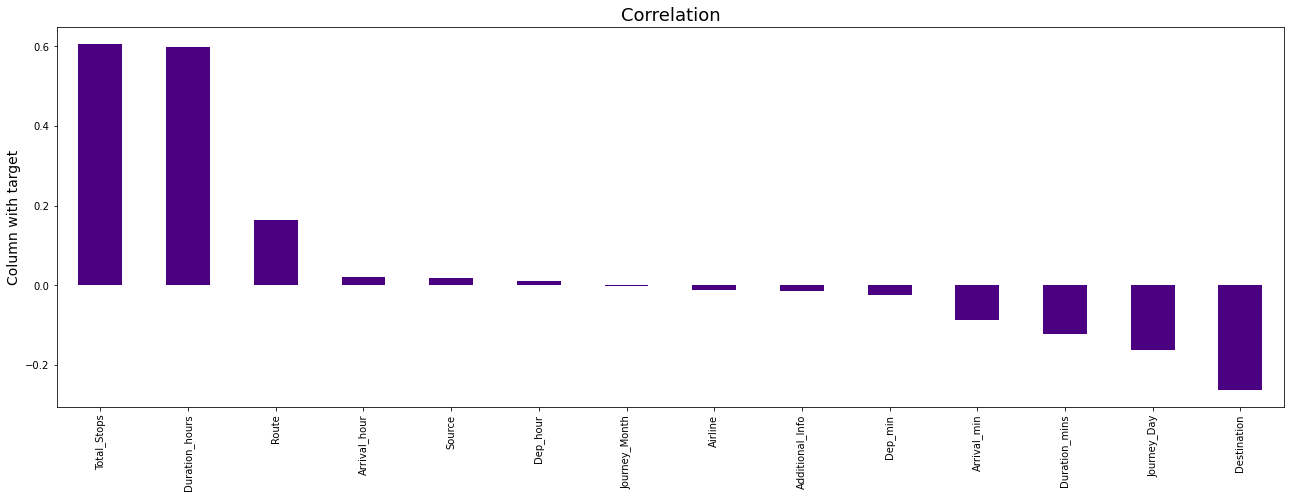

In [72]:
#Visualization of the Correlation Metrics

plt.figure(figsize=(22,7))
df_new.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='indigo')
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

**Total stops, Duration_hours and Destination are the most correlated features.**
* Journey_month, Dep_hour and Airline is least correlated with target.

## 3.5 Standardization

In [73]:
x= df_new.drop("Price",axis=1)
y = df_new["Price"]

In [74]:
#using standard scaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [75]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,-0.365139,-1.655042,0.812707,-1.544003,-1.221491,0.5058,1.286176,-0.820828,1.649475,-0.235894,-1.794784,-0.889208,-1.172690,1.274299
1,-1.413739,0.888124,-1.157048,0.254498,1.773560,0.5058,-0.873920,-1.884597,-1.312186,1.362715,-0.046050,-0.586465,-0.047674,-0.201145
2,0.159162,0.040402,-0.172170,1.180998,1.773560,0.5058,-0.760231,1.137073,-0.615325,0.030541,-1.357601,0.019019,1.097438,-1.676590
3,-0.365139,0.888124,-1.157048,0.445248,0.276034,0.5058,-0.873920,1.846346,0.952614,-1.035199,1.411228,0.321762,-0.388055,-0.201145
4,-0.365139,-1.655042,0.812707,-1.244253,0.276034,0.5058,-1.101299,-1.884597,0.604183,1.362715,1.119772,0.624504,-0.599233,0.979210


## 3.6 VIF Factor/ MultiCollinearity

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [77]:
vif_calc()

    VIF Factor         features
0     1.092662          Airline
1     1.503650           Source
2     1.658194      Destination
3     1.604637            Route
4     3.498884      Total_Stops
5     1.098413  Additional_Info
6     1.055777      Journey_Day
7     1.043392    Journey_Month
8     1.035428         Dep_hour
9     1.032044          Dep_min
10    1.048301     Arrival_hour
11    1.098607      Arrival_min
12    3.612085   Duration_hours
13    1.123464    Duration_mins


All values are below 5. so we can proceed with our dataset.

# 4- Now we have to perform all operation in Test data set also

In [78]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [79]:
df_test.shape

(2671, 10)

In [80]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [81]:
#Lets check if there are Null values

df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values in test dataset

In [82]:
#checking the unique value counts of each feature

df_test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [83]:
#lets check unique values for Airline

df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Most of the Data is of Flight- Jet Airways and no data for Trujet and 2 data for Vistara Premium economy and Jet Airways Business.

In [84]:
#lets check unique values for Destination       

df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

We have 2 Delhi.

In [85]:
#lets check unique values for Additional_Info

df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

We can change the columns as we did in train dataset

In [86]:
print("Test Data Information and Changes")
print("\n")
print("**********************************")
print(df_test.info())
print("**********************************")
print("                                        ")

print("Exploratory Data Analysis")
print("                             ")
print("----------------------------------")

#Changing dt of Date_of_Journey', 'Dep_Time', 'Arrival_Time'

def change_into_datetime(col):
    df_test[col]=pd.to_datetime(df_test[col])
    
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)
    
#seperating the day and month from dateofjourney:

df_test["Journey_Day"] = df_test["Date_of_Journey"].dt.day
df_test["Journey_Month"] = df_test["Date_of_Journey"].dt.month
#dropping Date_of_Journey:
df_test.drop(["Date_of_Journey"],axis=1, inplace = True)

#Seperating hours and minutes and dropping the Dep_Time

df_test["Dep_hour"]= pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

#Seperating hours and minutes and dropping the Arrival_Time

df_test["Arrival_hour"]= pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Formating the Duration to correct format 

dur = list(df_test['Duration'])

for i in range(len(dur)):
    if len(dur[i].split())!=2:
        if "h" in dur[i]:
            dur[i] = dur[i].strip()+' 0m'
        else:
            dur[i]= "0h "+dur[i]
            
dur_hours = []
dur_mins = []
for i in range(len(dur)):
    dur_hours.append(int(dur[i].split(sep="h")[0]))
    dur_mins.append(int(dur[i].split(sep="m")[0].split()[-1]))
    
    
df_test['Duration_hours']= dur_hours
df_test['Duration_mins']= dur_mins
#dropping duration column
df_test.drop(["Duration"],axis=1, inplace = True)

#Grouping Airlines column:
# All premium airlines to "Other"

df_test["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                            'Jet Airways Business':'Other',
                'Vistara Premium economy':'Other'}, inplace=True)

#Grouping Destination column as we have New delhi and Delhi:;

df_test['Destination'].replace({'New Delhi':'Delhi'},inplace=True)

#Grouping Addition Info:

df_test["Additional_Info"].replace({'1 Long layover':'Layover'},inplace=True)
df_test["Additional_Info"].replace({'Change airports':'Other','Business class':'Other'},
                                   inplace=True)

Test Data Information and Changes


**********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
**********************************
                                        
Exploratory Data Analysis
                             
----------------------------------


In [87]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [88]:
num_cols = ['Journey_Day',
 'Journey_Month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hours',
 'Duration_mins']

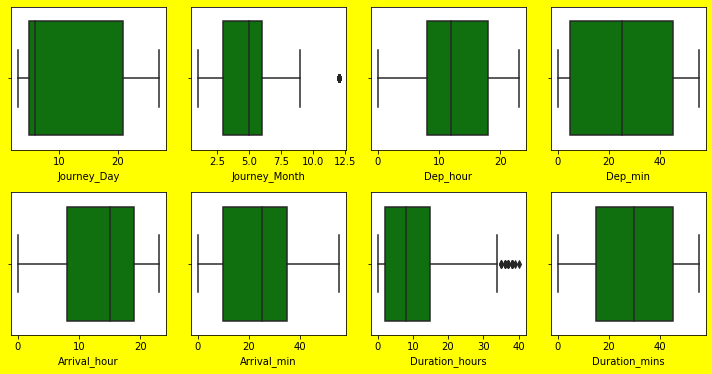

In [89]:
#Checking Outliers for all numerical columns:

plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(4,4,graph)

    sns.boxplot(df_test[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()


We have outliers in journey month and duration hours

In [90]:
out_cols= df[["Journey_Month","Duration_hours"]]

from scipy.stats import zscore

z=np.abs(zscore(out_cols))
df_testnew=df_test[(z<3).all(axis=1)]
df_testnew

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,4,0,19,15,15,15


In [91]:
print('old data shape:',df_test.shape)
print('new data shape:',df_testnew.shape)

old data shape: (2671, 14)
new data shape: (2654, 14)


In [92]:
#checking the loss percentage

loss_percentage=(((2671-2654)/2671)*100)
loss_percentage

0.636465743167353

Loss percentage is very low and so we can proceed

In [93]:
#Skewness

df_testnew.skew()

Journey_Day       0.477480
Journey_Month     0.589720
Dep_hour          0.089648
Dep_min           0.126586
Arrival_hour     -0.441421
Arrival_min       0.115106
Duration_hours    0.882864
Duration_mins    -0.105053
dtype: float64

In [94]:
#Removing the Skewness using power transformer

skew_cols=["Journey_Month","Duration_hours"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_testnew[skew_cols] = scaler.fit_transform(df_testnew[skew_cols].values)

In [95]:
df_testnew.skew()

Journey_Day       0.477480
Journey_Month    -0.032768
Dep_hour          0.089648
Dep_min           0.126586
Arrival_hour     -0.441421
Arrival_min       0.115106
Duration_hours   -0.033827
Duration_mins    -0.105053
dtype: float64

skewness is removed

In [96]:
#Encoding

cat_cols=['Airline', 'Source', "Route",'Destination', 'Additional_Info']
df_testnew.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,
                "4 stops": 4},inplace = True)

In [97]:
df_testnew[cat_cols].head()

,Airline,Source,Route,Destination,Additional_Info
0,Jet Airways,Delhi,DEL → BOM → COK,Cochin,No info
1,IndiGo,Kolkata,CCU → MAA → BLR,Banglore,No info
2,Jet Airways,Delhi,DEL → BOM → COK,Cochin,In-flight meal not included
3,Multiple carriers,Delhi,DEL → BOM → COK,Cochin,No info
4,Air Asia,Banglore,BLR → DEL,Delhi,No info


In [98]:
#Encoding the categorical columns using Ordinal Encoder:

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df_testnew[i]=enc.fit_transform(df_testnew[i].values.reshape(-1,1))

In [99]:
df_testnew[cat_cols].head()

,Airline,Source,Route,Destination,Additional_Info
0,4.0,2.0,75.0,1.0,3.0
1,3.0,3.0,64.0,0.0,3.0
2,4.0,2.0,75.0,1.0,0.0
3,5.0,2.0,75.0,1.0,3.0
4,0.0,0.0,16.0,2.0,3.0


In [100]:
#using standard scaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_testnew), columns=df_testnew.columns)

In [101]:
#small x for train dataset and X for test dataset

X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0.147447,0.034973,-0.168379,0.798789,0.247634,0.472015,-0.704679,0.261281,0.769815,0.265600,-1.361112,0.026192,0.323258,1.585088
1,-0.366102,0.878784,-1.179412,0.388091,0.247634,0.472015,-0.821546,1.805093,-1.162267,-0.258297,-0.509066,-0.272145,-0.615345,-1.696365
2,0.147447,0.034973,-0.168379,0.798789,0.247634,-2.210484,1.048322,-0.064498,1.121103,-0.520245,0.769003,-1.465494,1.325222,0.988460
3,0.660996,0.034973,-0.168379,0.798789,0.247634,0.472015,1.048322,-0.064498,-0.810980,-1.306090,1.053019,-1.465494,0.624946,-1.696365
4,-1.906749,-1.652648,0.842655,-1.404045,-1.239292,0.472015,1.398922,0.261281,1.823678,1.575342,-1.645128,1.219540,-1.186309,1.286774


In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["features"]=X.columns
    print(vif)

In [103]:
vif_calc()

    VIF Factor         features
0     1.117948          Airline
1     1.387830           Source
2     1.609068      Destination
3     1.533164            Route
4     3.567515      Total_Stops
5     1.087004  Additional_Info
6     1.049275      Journey_Day
7     1.042756    Journey_Month
8     1.056459         Dep_hour
9     1.036065          Dep_min
10    1.039916     Arrival_hour
11    1.106592      Arrival_min
12    3.560252   Duration_hours
13    1.121254    Duration_mins


All values below 5. **Our test data is clean from Outliers, Skewness removed, Encoded and standardized, and no Multicollinearity.**

# 5- Building the model using Train dataset

In [104]:
x.shape

(10617, 14)

In [105]:
y.shape

(10617,)

In [106]:
#Importing regression libraries

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## 5.1 Linear Regression

In [108]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.5086597837364937 seen for random state: 52


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))

The r2 score is: 0.5086597837364937
The mean absolute error 2341.9450279799876
The mean squared error 9644905.026989955


In [110]:
#Hyperparameter tuning for Linear Regression

par_grid =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(estimator=lm, param_grid=par_grid, cv=5,n_jobs=1, verbose=1)

grid_lm.fit(x_train, y_train)
print("The best estimators:", grid_lm.best_estimator_)
print("The best score:", grid_lm.best_score_)
print("The best parameters:", grid_lm.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best estimators: LinearRegression(normalize=False)
The best score: 0.44905506512322696
The best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [111]:
#RE INSTANTIATING WITH BEST PARAMETERS

grid_lm = LinearRegression(copy_X=True, fit_intercept=False, normalize=True)
grid_lm.fit(x_train, y_train)
y_pred1 = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred1))
print('The mean absolute error', mean_absolute_error(y_test, y_pred1))
print('The mean squared error', mean_squared_error(y_test, y_pred1))

The r2 score is: 0.5086597837364937
The mean absolute error 2341.9450279799876
The mean squared error 9644905.026989955


Score not improved

Text(0, 0.5, 'Predicted Y')

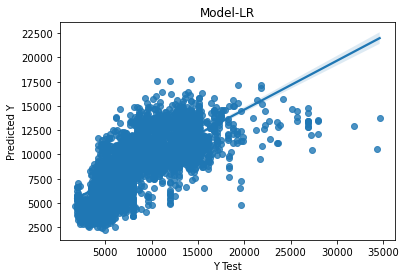

In [112]:
sns.regplot(x=y_test,y=y_pred1)
plt.title("Model-LR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Not a good model

## 5.2 Ridge Regularization

In [113]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    Rd = Ridge()
    Rd.fit(x_train,y_train)
    pred = Rd.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.508658717345212 seen for random state: 52


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)
pred = Rd.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(Rd, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.510557735732937
The mean absolute error 2331.6617580971238
The mean squared error 9607648.628784472
The cross validation score 0.4630413703704318


Text(0, 0.5, 'Predicted Y')

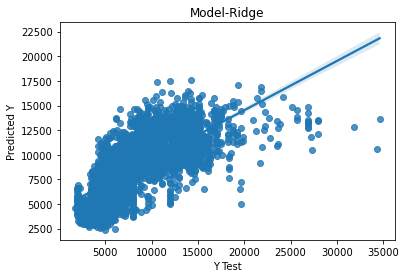

In [115]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-Ridge")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Score is not good

## 5.3 KNN Regressor

In [116]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.7752244059400837 seen for random state: 69


In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_knn))
print('The mean absolute error', mean_absolute_error(y_test, pred_knn))
print('The mean squared error', mean_squared_error(y_test, pred_knn))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

The r2 score is: 0.7752244059400837
The mean absolute error 1336.7623979912116
The mean squared error 4534778.728750785
root_mean_squared_error: 2129.5019907834753


In [118]:
#Hyperparameter tuning of KNN

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

knn = KNeighborsRegressor()
knn_grid_param={"n_neighbors": [3,5,7],
                "weights": ["uniform","distance"],
                'metric' : ['minkowski','euclidean','manhattan'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='r2',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.7939242088428256


In [119]:
#Reinstating with best params:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)
knn_H = KNeighborsRegressor(algorithm='brute',metric='manhattan',n_neighbors=7,weights='distance')
knn_H.fit(x_train,y_train)
predknn = knn_H.predict(x_test)

print('The r2 score is:', r2_score(y_test, predknn))
print('The mean absolute error', mean_absolute_error(y_test, predknn))
print('The mean squared error', mean_squared_error(y_test, predknn))

The r2 score is: 0.825832133579534
The mean absolute error 1124.4299391898032
The mean squared error 3513783.3321214784


#### Our score is improved

Text(0, 0.5, 'Predicted Y')

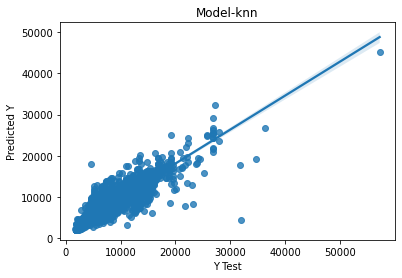

In [120]:
#plotting regplot 

sns.regplot(x=y_test,y=predknn)
plt.title("Model-knn")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Score is pretty good

## 5.4 Random Forest Regressor

In [121]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rdf = RandomForestRegressor()
    rdf.fit(x_train,y_train)
    pred = rdf.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9139572545279167 seen for random state: 88


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)
rdf = RandomForestRegressor()
rdf.fit(x_train,y_train)
pred_rdf = rdf.predict(x_test)

print('The r2 score is:', r2_score(y_test, pred_rdf))
print('The mean absolute error', mean_absolute_error(y_test, pred_rdf))
print('The mean squared error', mean_squared_error(y_test, pred_rdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_rdf)))

The r2 score is: 0.9151931765384254
The mean absolute error 653.761347269892
The mean squared error 1767597.7843010395
root_mean_squared_error: 1329.5103550935733


In [123]:
#HyperParameter Tuning for Random Forest Regressor

from sklearn.model_selection import RandomizedSearchCV

parameters={'min_samples_split':[5,10,15,100],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8,10,30],
            'max_features':['sqrt','log2',None]}

g=RandomizedSearchCV(RandomForestRegressor(),param_distributions = parameters,scoring='r2',
                     cv = 5, n_iter = 10, n_jobs=-1)
g.fit(x_train,y_train)
pred_g=g.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_g))
print("\n The best estimator across ALL searched params:\n", g.best_estimator_)
print("\n The best score across ALL searched params:\n", g.best_score_)
print("\n The best parameters across ALL searched params:\n",g.best_params_)

The r2 score is: 0.9174506372174578

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=200)

 The best score across ALL searched params:
 0.8465308214321692

 The best parameters across ALL searched params:
 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 30}


In [124]:
#reinstating with tuned parameters
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)
rdf_H = RandomForestRegressor(max_depth=30,max_features='sqrt',min_samples_split= 5,
                              n_estimators=200)
rdf_H.fit(x_train,y_train)
predrdf = rdf_H.predict(x_test)
print('The r2 score is:', r2_score(y_test, predrdf))
print('The mean absolute error', mean_absolute_error(y_test, predrdf))
print('The mean squared error', mean_squared_error(y_test, predrdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,predrdf)))

The r2 score is: 0.9158993182917678
The mean absolute error 774.4827416048937
The mean squared error 1752879.9285004833
root_mean_squared_error: 1323.963718725133


#### Score after tuning is almost same

Text(0, 0.5, 'Predicted Y')

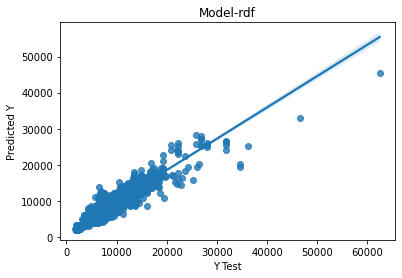

In [125]:
sns.regplot(x=y_test,y=predrdf)
plt.title("Model-rdf")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Score is 91.32% which is good

## 5.5 XGB Regressor

In [107]:
from xgboost import XGBRegressor

#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    XGB=XGBRegressor()
    XGB.fit(x_train,y_train)
    xgb_pred=XGB.predict(x_test)
    acc = r2_score(y_test, xgb_pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9256160575179703 seen for random state: 88


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [109]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
xgb_pred=XGB.predict(x_test)
print('The r2 score is:', r2_score(y_test,xgb_pred))
print('The mean squared error', mean_squared_error(y_test,xgb_pred))
print('The mean absolute error', mean_absolute_error(y_test,xgb_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,xgb_pred)))

The r2 score is: 0.9256160575179703
The mean squared error 1550357.4659695239
The mean absolute error 713.4397693353858
root_mean_squared_error: 1245.133513310731


In [ ]:
param_grid = dict(learning_rate=[0.01, 0.03, 0.05, 0.1], max_depth=[5, 7, 10], 
                  n_estimators=[100, 200,300],gamma=[0.05, 0.5],
                  reg_alpha=[0, 0.5],reg_lambda=[1, 0])

model = XGBRegressor(random_state=max_RS, verbosity=1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='r2')

best_model = grid_search.fit(x_train, y_train)
print('Optimum parameters', best_model.best_params_)

In [130]:
#reinstating with tuned param:

XGB_H=XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=300,
                   reg_alpha=0,reg_lambda=1,gamma=0.05)
XGB_H.fit(x_train,y_train)
xgbpred=XGB_H.predict(x_test)
print('The r2 score is:', r2_score(y_test,xgbpred))
print('The mean squared error', mean_squared_error(y_test,xgbpred))
print('The mean absolute error', mean_absolute_error(y_test,xgbpred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,xgbpred)))

The r2 score is: 0.9167963398404573
The mean squared error 1734183.6345324381
The mean absolute error 781.5466240776909
root_mean_squared_error: 1316.884062676908


#### Score not improved

Text(0, 0.5, 'Predicted Y')

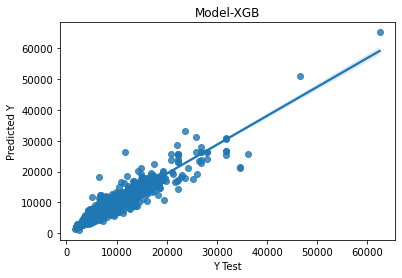

In [131]:
sns.regplot(x=y_test,y=xgb_pred)
plt.title("Model-XGB")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Score is good

## 5.6 Gradient Boosting Regressor

In [132]:
#Selecting the best random state to get maximum accuracy.

from sklearn.ensemble import GradientBoostingRegressor
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    GBR=GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    pred=GBR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8473578513845419 seen for random state: 49


In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_RS)

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_gbr=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_gbr))
print('mean_squared_error:',mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error:',mean_absolute_error(y_test,pred_gbr))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_score: 0.8468813612096612
mean_squared_error: 3142385.707975037
mean_absolute_error: 1202.8365340521455
root_mean_squared_error: 1772.6775533003843


Text(0, 0.5, 'Predicted Y')

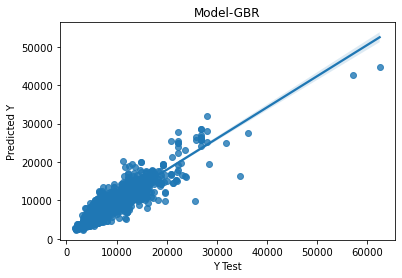

In [135]:
#plotting regplot

sns.regplot(x=y_test,y=pred_gbr)
plt.title("Model-GBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Cross Validation

In [136]:
cv = cross_val_score(lm, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.4630411372788997


In [137]:
cv = cross_val_score(Rd, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.4630413703704318


In [138]:
cv = cross_val_score(knn_H, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.7939242088428256


In [139]:
cv = cross_val_score(rdf_H, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.886417393534285


In [140]:
cv = cross_val_score(XGB, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.8952615663961442


In [142]:
cv = cross_val_score(GBR, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.8139464336231385


In [146]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models = [LinearRegression(),Ridge(),KNeighborsRegressor(),RandomForestRegressor(),
          XGBRegressor(),GradientBoostingRegressor()]
            
names = ['LR','Rd','knn','rdf','xgb','gbr']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 11406844.161654, 619019.892045
Rd    : 11406840.387313, 619036.600385
knn    : 5432484.922254, 329154.159416
rdf    : 2615246.266214, 377039.683829
xgb    : 2218995.761387, 158553.477619
gbr    : 3955704.023358, 316260.577109


* lm- The r2 score is: 0.5086597837364936,The cross validation score 0.4630411372788997
* Rd- The r2 score is: 0.510557735732937,The cross validation score 0.4630413703704318
* knn_H- The r2 score is: 0.825832133579534,The cross validation score 0.7939242088428256
* rdf_H- The r2 score is: 0.9158993182917678,The cross validation score 0.886417393534285
* XGB- The r2 score is: 0.9256160575179703,The cross validation score 0.8952615663961442
* GBR- R2_score: 0.8499649408725506,The cross validation score 0.8139464336231385

* LR    : 11406844.161654, 619019.892045
* Rd    : 11406840.387313, 619036.600385
* knn    : 5432484.922254, 329154.159416
* rdf    : 2615246.266214, 377039.683829
* xgb    : 2218995.761387, 158553.477619
* gbr    : 3955704.023358, 316260.577109

#### Based on all scores, I am taking XGB as my final model

### XGB- The r2 score is: 92.09%, The cross validation score: 89.28%, 
RMSE : 2218995.761387, 158553.477619

# Saving the Model

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=88)
Final_model=XGBRegressor()
Final_model.fit(x_train,y_train)
pred_xgb = Final_model.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_xgb))

The r2 score is: 0.9256160575179703
The mean absolute error 713.4397693353858
The mean squared error 1550357.4659695239
root_mean_squared_error: 1245.133513310731


In [149]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_model,"Flight_Fare_Prediction.pkl")

['Flight_Fare_Prediction.pkl']

# Predicting Price for Test DataSet

In [151]:
X

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0.147447,0.034973,-0.168379,0.798789,0.247634,0.472015,-0.704679,0.261281,0.769815,0.265600,-1.361112,0.026192,0.323258,1.585088
1,-0.366102,0.878784,-1.179412,0.388091,0.247634,0.472015,-0.821546,1.805093,-1.162267,-0.258297,-0.509066,-0.272145,-0.615345,-1.696365
2,0.147447,0.034973,-0.168379,0.798789,0.247634,-2.210484,1.048322,-0.064498,1.121103,-0.520245,0.769003,-1.465494,1.325222,0.988460
3,0.660996,0.034973,-0.168379,0.798789,0.247634,0.472015,1.048322,-0.064498,-0.810980,-1.306090,1.053019,-1.465494,0.624946,-1.696365
4,-1.906749,-1.652648,0.842655,-1.404045,-1.239292,0.472015,1.398922,0.261281,1.823678,1.575342,-1.645128,1.219540,-1.186309,1.286774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,-1.393200,0.878784,-1.179412,-0.134616,0.247634,0.472015,-0.704679,0.261281,1.296747,0.265600,0.911011,0.026192,1.325222,1.585088
2650,-0.366102,0.878784,-1.179412,-0.433305,-1.239292,0.472015,1.749523,-0.826892,0.242884,-0.258297,0.342980,1.816214,-1.186309,0.391832
2651,0.147447,0.034973,-0.168379,0.798789,0.247634,0.472015,-1.055279,0.261281,1.472390,1.313394,-1.361112,0.026192,-0.223542,0.391832
2652,-1.393200,0.034973,-0.168379,0.798789,0.247634,0.472015,-1.055279,0.261281,-1.513555,-1.306090,0.769003,-0.570483,0.795044,-0.801424


In [152]:
#Loading the saved model

Model=joblib.load("Flight_Fare_Prediction.pkl")

In [153]:
#Predicting the Price for Test dataset

predict_test=Model.predict(X) 
print(predict_test)

[14196.581   4010.5544 12359.947  ... 16708.17   12891.218   7426.824 ]


In [154]:
#lets make a dataframe for the predicted Price for the test dataset

Price_Test=pd.DataFrame(data=predict_test)
Price_Test

,0
0,14196.581055
1,4010.554443
2,12359.947266
3,10158.370117
4,2492.874023
...,...
2649,9015.138672
2650,5091.574219
2651,16708.169922
2652,12891.217773


In [155]:
X["Price"]= Price_Test

In [156]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
0,0.147447,0.034973,-0.168379,0.798789,0.247634,0.472015,-0.704679,0.261281,0.769815,0.265600,-1.361112,0.026192,0.323258,1.585088,14196.581055
1,-0.366102,0.878784,-1.179412,0.388091,0.247634,0.472015,-0.821546,1.805093,-1.162267,-0.258297,-0.509066,-0.272145,-0.615345,-1.696365,4010.554443
2,0.147447,0.034973,-0.168379,0.798789,0.247634,-2.210484,1.048322,-0.064498,1.121103,-0.520245,0.769003,-1.465494,1.325222,0.988460,12359.947266
3,0.660996,0.034973,-0.168379,0.798789,0.247634,0.472015,1.048322,-0.064498,-0.810980,-1.306090,1.053019,-1.465494,0.624946,-1.696365,10158.370117
4,-1.906749,-1.652648,0.842655,-1.404045,-1.239292,0.472015,1.398922,0.261281,1.823678,1.575342,-1.645128,1.219540,-1.186309,1.286774,2492.874023


In [158]:
X.to_csv("Flight_Price_Test.csv",index=False)

# Saved